In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


             Features
Nulls_count          
brand               0
year                0
time-to-60          0
weightlbs           0
hp                  0
cubicinches         0
cylinders           0
mpg                 0
0
0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64
mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64


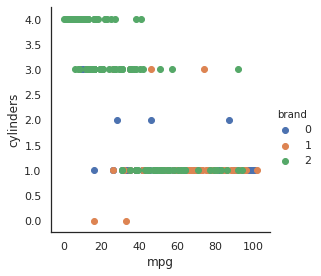

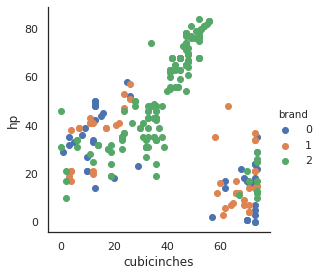

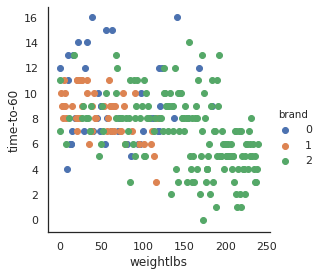

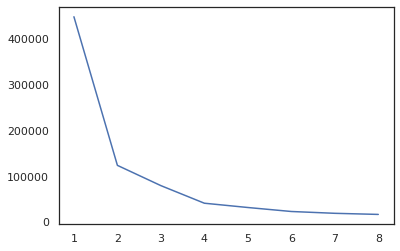

Silhouette score for k=2: 0.656735637586314
Silhouette score for k=3: 0.5891108798858462
Silhouette score for k=4: 0.5187172839639153


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/Lab1/cars.csv', delimiter=',', header=None, skiprows=1, names=['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year','brand'])
# Nulls Handling
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Features']
nulls.index.name = 'Nulls_count'
print(nulls)
x = data.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(x.isnull().sum()  != 0))

# Encoding non-numeric features
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)

# Here we are filling the null values with mean value
data=data.apply(lambda x: x.fillna(x.mean()),axis=0)
print(data["brand"])
print(data.isnull().sum())

# Visualize data to analyze our features correlations
import seaborn as sns
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
sns.FacetGrid(data, hue='brand', height=4).map(plt.scatter, 'mpg', 'cylinders').add_legend()
plt.show()
sns.FacetGrid(data, hue='brand', height=4).map(plt.scatter, 'cubicinches', 'hp').add_legend()
plt.show()
sns.FacetGrid(data, hue='brand', height=4).map(plt.scatter, 'weightlbs', 'time-to-60').add_legend()
plt.show()

#Apply k-means algorithm
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
#Visualize elbow method
import matplotlib.pyplot as plt
plt.plot(range(1, 9), wcss)
plt.title = 'The Elbow Method'
plt.xlabel = 'n-clusters'
plt.ylabel = 'wcss'
plt.show()

#Found k=2
km = KMeans(n_clusters=2)
from sklearn.metrics import silhouette_score
km.fit(x)
x_pred = km.predict(x)
print('Silhouette score for k=2:', silhouette_score(x, x_pred))
#Found k=3
km = KMeans(n_clusters=3)
from sklearn.metrics import silhouette_score
km.fit(x)
x_pred = km.predict(x)
print('Silhouette score for k=3:', silhouette_score(x, x_pred))
#Found k=4
km = KMeans(n_clusters=4)
from sklearn.metrics import silhouette_score
km.fit(x)
x_pred = km.predict(x)
print('Silhouette score for k=4:', silhouette_score(x, x_pred))